# Credit Card Fraud Detection

## Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Dataset

In [2]:
df = pd.read_csv('D:/shivani/DATA/creditcard.csv')

## Prepare the Data

In [3]:
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

## Split the Data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Build the Random Forest Model

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluate the Model

Accuracy: 0.9996137776061234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



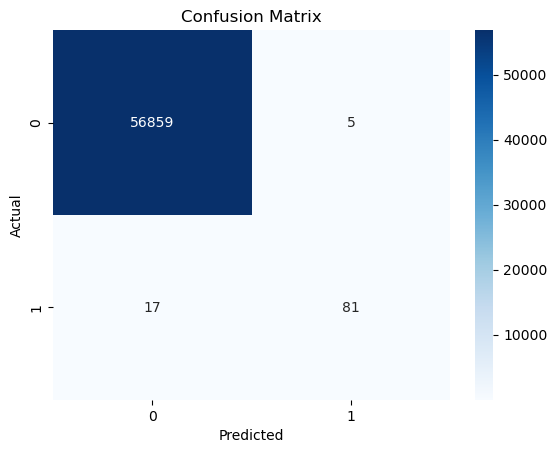

In [6]:
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Feature Importance

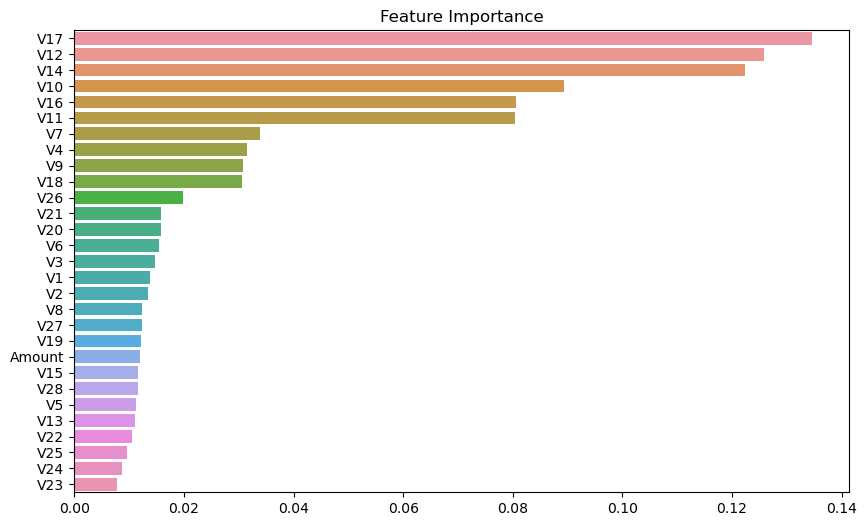

In [7]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

## Save the Model and Results

In [9]:
import joblib
joblib.dump(rf_model, 'D:/shivani/DATA/random_forest_model.pkl')

['D:/shivani/DATA/random_forest_model.pkl']